# Problem set 1: Solving the consumer problem

In this first problem set, we will take a look at solving the canonical utility maximization problem for the consumer.  

* **Problem set structure:** Each problem set consists of tasks and problems. _Tasks_ train you in using specific techniques, while _problems_ train you in solving actual economic problems. Each problem set also contains solutions in hidden cells. *You should really try to solve the tasks and problems on your own before looking at the answers!*

* **Multiple solutions:** Within the field of numerical analysis there is often many more than one way of solving a specific problem. So the solution provided is just one example. If you get the same result, but use another approach, that might be just as good (or even better).

* **Extra problems:** Solutions to the extra problems are not provided, but we encourage you to take a look at them if you have the time. You can share your solution with your fellow students following this [guide](https://numeconcopenhagen.netlify.com/guides/snippets/).

# Tasks

## functions

Implement a Python version of this function:

\\[ u(x_1,x_2) = (\alpha x_1^{-\beta} + (1-\alpha) x_2^{-\beta})^{-1/\beta} \\]

In [1]:
# write your code here

**Answer:**

In [2]:
def u(x1,x2,alpha=0.5,beta=1):
    return (alpha*x1**(-beta) + (1-alpha)*x2**(-beta))**(-1/beta)

## print

In [3]:
x1_vec = [1.05,1.3,2.3,2.5,3.1]
x2_vec = [1.05,1.3,2.3,2.5,3.1]

Construct a Python function `print_table(x1_vec,x2_vec)` to print values of `u(x1,x2)` in the table form shown below.

In [4]:
# write your code here

**Answer:**

In [5]:
def print_table(x1_vec,x2_vec):
    
    # a. empty text
    text = ''
    
    # b. top header
    text += f'{"":3s}'
    for j, x2 in enumerate(x2_vec):
       text += f'{j:6d}' 
    text += '\n' # line shift
    
    # c. body
    for i,x1 in enumerate(x1_vec):
        if i > 0:
            text += '\n' # line shift
        text += f'{i:3d} ' # left header
        for j, x2 in enumerate(x2_vec):
            text += f'{u(x1,x2):6.3f}'
    
    # d. print
    print(text)

print_table(x1_vec,x2_vec)

        0     1     2     3     4
  0  1.050 1.162 1.442 1.479 1.569
  1  1.162 1.300 1.661 1.711 1.832
  2  1.442 1.661 2.300 2.396 2.641
  3  1.479 1.711 2.396 2.500 2.768
  4  1.569 1.832 2.641 2.768 3.100


## matplotlib

Reproduce the figure below of \\(u(x_1,x_2)\\) using the `meshgrid` function from _numpy_ and the `plot_surface` function from _matplotlib_. 

In [6]:
# evaluate utility function
import numpy as np
x1_grid,x2_grid = np.meshgrid(x1_vec,x2_vec,indexing='ij')
u_grid = u(x1_grid,x2_grid)

# import plot modules
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm # for colormaps

# write your code here

**Answer:**

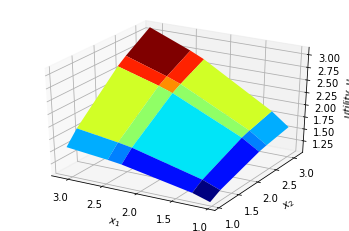

In [7]:
# a. plot
fig = plt.figure()
ax = fig.add_subplot(1,1,1,projection='3d')
ax.plot_surface(x1_grid,x2_grid,u_grid,cmap=cm.jet)

# b. add labels
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$utility,u$')

# c. invert xaxis
ax.invert_xaxis()

## optimize

Consider the following minimization problem:

\\[\min_x  f(x) = \min_x \sin(x) + 0.05 \cdot x^2 \\]

Solve this problem and illustrate your results.

In [8]:
# write your code here

**Answer:**

best with loop is           -0.88366802 at x = -1.51515152
best with scipy.optimize is -0.88786283 at x = -1.42756250


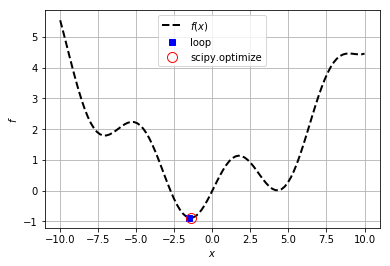

In [9]:
# a. define function
def f(x):
    return np.sin(x)+0.05*x**2

# b. solution using a loop
import numpy as np
N = 100
x_vec = np.linspace(-10,10,N)
f_vec = np.empty(N)

f_best = np.inf # initial maximum
x_best = np.nan # not-a-number

for i,x in enumerate(x_vec):
    f_now = f_vec[i] = f(x)
    if f_now < f_best:
        x_best = x
        f_best = f_now

# c. solution using scipy optmize
from scipy import optimize
x_guess = [0]      
objective_function = lambda x: f(x[0])
res = optimize.minimize(objective_function, x_guess, method='Nelder-Mead')
x_best_scipy = res.x[0]
f_best_scipy = res.fun

# d. print
print(f'best with loop is           {f_best:.8f} at x = {x_best:.8f}')
print(f'best with scipy.optimize is {f_best_scipy:.8f} at x = {x_best_scipy:.8f}')

# e. figure
import matplotlib.pyplot as plt
fig = plt.figure() # dpi = dots-per-inch (resolution)
ax = fig.add_subplot(1,1,1)

ax.plot(x_vec,f_vec,ls='--',lw=2,color='black',label='$f(x)$')
ax.plot(x_best,f_best,ls='',marker='s',color='blue',label='loop')
ax.plot(x_best_scipy,f_best_scipy,ls='',marker='o',
        markersize=10,markerfacecolor='none',
        markeredgecolor='red',label='scipy.optimize')

ax.set_xlabel('$x$')
ax.set_ylabel('$f$')
ax.grid(True)
ax.legend(loc='upper center');

# Problem

Consider the following \\(M\\)-good, \\(x=(x_1,x_2,\dots,x_M)\\), **utility maximization problem** with exogenous income \\(I\\), and price-vector \\(p=(p_1,p_2,\dots,p_M)\\),

\\[
\begin{eqnarray*}
V(p_{1},p_{2},\dots,,p_{M},I) & = & \max_{x_{1},x_{2},\dots,x_M} x_{1}^{\alpha_1} x_{2}^{\alpha_2} \dots x_{M}^{\alpha_M} \\
 & \text{s.t.}\\
E = \sum_{i=1}^{M}p_{i}x_{i} & \leq & I,\,\,\,p_{1},p_{2},\dots,p_M,I>0\\
x_{1},x_{2},\dots,x_M & \geq & 0
\end{eqnarray*}
\\]

**Problem:** Solve the 5-good utility maximization problem for arbitrary preference parameters, \\( \alpha = (\alpha_1,\alpha_2,\dots,\alpha_5)\\), prices and income.

You can use the following functions:

In [10]:
def utility_function(x,alpha):
    u = 1
    for x_now,alpha_now in zip(x,alpha):
        u *= np.max(x_now,0)**alpha_now
    return u

def expenditures(x,p):
    E = 0
    for x_now,p_now in zip(x,p):
        E += p_now*x_now
    return E

def print_solution(x,alpha,I,p):
    
    # a. x values
    text = 'x = ['
    for x_now in x:
        text += f'{x_now:.2f} '
    text += f']\n'
    
    # b. utility
    u = utility_function(x,alpha)    
    text += f'utility = {u:.3f}\n'
    
    # c. expenditure vs. income
    E =  expenditures(x,p)
    text += f'E = {E:.2f} <= I = {I:.2f}\n'
    
    # d. expenditure shares
    e = p*x/I
    text += 'expenditure shares = ['
    for e_now in e:
        text += f'{e_now:.2f} '
    text += f']'        
        
    print(text)

You can initially use the following parameter choices:

In [11]:
alpha = np.ones(5)/5
p = np.array([1,2,3,4,5])
I = 10

In [12]:
# write your code here

## Solutions using loops

Using **raw loops**:

In [13]:
N = 15 # number of points in each dimension
fac = np.linspace(0,1,N) # vector betweein 0 and 1
x_max = I/p # maximum x so E = I

u_best = -np.inf
x_best = np.empty(5)
for x1 in fac:
   for x2 in fac:
        for x3 in fac:
            for x4 in fac:
                for x5 in fac:
                    x = np.array([x1,x2,x3,x4,x5])*x_max
                    E = expenditures(x,p)
                    if E <= I:
                        u_now = utility_function(x,alpha)
                        if u_now > u_best:
                            x_best = x
                            u_best = u_now

print_solution(x_best,alpha,I,p)

x = [2.14 1.07 0.71 0.36 0.43 ]
utility = 0.758
E = 10.00 <= I = 10.00
expenditure shares = [0.21 0.21 0.21 0.14 0.21 ]


Using **smart itertools loop:**

In [14]:
import itertools as it

N = 15 # number of points in each dimension
fac = np.linspace(0,1,N) # vector betweein 0 and 1
x_max = I/p # maximum x so E = I

x_best = np.empty(5)
u_best = -np.inf
for x in it.product(fac,fac,fac,fac,fac):
    x *= x_max
    E = expenditures(x,p)
    if E <= I:
        u_now = utility_function(x,alpha)
        if u_now > u_best:
            x_best = x
            u_best = u_now
          
print_solution(x_best,alpha,I,p)       

x = [2.14 1.07 0.71 0.36 0.43 ]
utility = 0.758
E = 10.00 <= I = 10.00
expenditure shares = [0.21 0.21 0.21 0.14 0.21 ]


## Solutions using solvers

In [15]:
from scipy import optimize

Solution using a **constrained optimizer:**

In [16]:
# a. contraint function (negative if violated)
constraints = ({'type': 'ineq', 'fun': lambda x:  I-expenditures(x,p)})
bounds = [(0,I/p_now) for p_now in p]

# b. call optimizer
initial_guess = (I/p)/6 # some guess
res = optimize.minimize(
    lambda x: -utility_function(x,alpha),initial_guess,
    method='SLSQP',bounds=bounds,constraints=constraints)

# c. print result
print_solution(res.x,alpha,I,p)

x = [2.00 1.00 0.67 0.50 0.40 ]
utility = 0.768
E = 10.00 <= I = 10.00
expenditure shares = [0.20 0.20 0.20 0.20 0.20 ]


Solution using an **unconstrained optimizer:**

In [17]:
# a. define objective function
def unconstrained_objective(x,alpha,I,p):
    
    penalty = 0
    E = expenditures(x,p)
    if E >= I:
        ratio = I/E
        x *= ratio # now p*x = I
        penalty = 1000*(E-I)**2
    
    u = utility_function(x,alpha)
    return -u + penalty

# b. call optimizer
initial_guess = (I/p)/6
res = optimize.minimize(
    unconstrained_objective,initial_guess,
    method='Nelder-Mead',args=(alpha,I,p))

# c. print result
print_solution(res.x,alpha,I,p)   

x = [2.00 1.00 0.67 0.50 0.40 ]
utility = 0.768
E = 10.00 <= I = 10.00
expenditure shares = [0.20 0.20 0.20 0.20 0.20 ]


# Extra Problems

## Cost minimization

Consider the following 2-good **cost minimziation problem** with required utility \\(u_0\\), and price-vector \\(p=(p_1,p_2)\\),

\\[
\begin{eqnarray*}
E(p_{1},p_{2},u_0) & = & \min_{x_{1},x_{2}} p_1 x_1+p_2 x_2\\
 & \text{s.t.}\\
x_{1}^{\alpha}x_{2}^{1-\alpha} & \geq & u_0 \\
x_{1},x_{2} & \geq & 0
\end{eqnarray*}
\\]

**Problem:** Solve the 2-good cost-minimization problem with arbitrary required utility, prices and income. Present your results graphically showing that the optimum is a point, where a budgetline is targent to the indifference curve through $u_0$.

## Classy solution

**Problem:** Implement your solution to the utility maximization problem and/or the cost minimization problem above in a class as seen in Lecture 3. 